In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
%matplotlib inline
import numpy

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
data = pd.read_csv("training_set_features.csv")

In [4]:
data.head()

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   
3              3          1.0            1.0                        0.0   
4              4          2.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_xyz  doctor_recc_seasonal  \
0                    1.0              0.0                   0.0   
1                    1.0              0.0                   0.0   
2                    0.0              NaN                   NaN   
3                    0.0              0.0                   1.0   
4                    1.0              0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_xyz_vacc_effective  opinion_xyz_risk  \
0               1.0                         3.0               1.0   
1               1.0                         5.0               4.0   
2               NaN                         3.0               1.0   
3               NaN                         3.0               3.0   
4               NaN                         3.0               3.0   

   opinion_xyz_sick_from_vacc  opinion_seas_vacc_effective  opinion_seas_risk  \
0                         2.0                          2.0                1.0   
1                         4.0                          4.0                2.0   
2                         1.0                          4.0                1.0   
3                         5.0                          5.0                4.0   
4                         2.0                          3.0                1.0   

   opinion_seas_sick_from_vacc      age_group         education   race  \
0                          2.0  55 - 64 Years        < 12 Years  White   
1                          4.0  35 - 44 Years          12 Years  White   
2                          2.0  18 - 34 Years  College Graduate  White   
3                          1.0      65+ Years          12 Years  White   
4                          4.0  45 - 54 Years      Some College  White   

      sex             income_poverty marital_status rent_or_own  \
0  Female              Below Poverty    Not Married         Own   
1    Male              Below Poverty    Not Married        Rent   
2    Male  <= $75,000, Above Poverty    Not Married         Own   
3  Female              Below Poverty    Not Married        Rent   
4  Female  <= $75,000, Above Poverty        Married         Own   

    employment_status hhs_geo_region                census_msa  \
0  Not in Labor Force       oxchjgsf                   Non-MSA   
1            Employed       bhuqouqj  MSA, Not Principle  City   
2            Employed 

In [5]:
data.shape

(26707, 36)

In [6]:
data=data.loc[:,['xyz_concern','xyz_knowledge','doctor_recc_xyz','chronic_med_condition','opinion_xyz_vacc_effective','opinion_xyz_risk','opinion_xyz_sick_from_vacc']]

In [7]:
data.shape

(26707, 7)

In [8]:
data.head()

xyz_concern  xyz_knowledge  doctor_recc_xyz  chronic_med_condition  \
0          1.0            0.0              0.0                    0.0   
1          3.0            2.0              0.0                    0.0   
2          1.0            1.0              NaN                    1.0   
3          1.0            1.0              0.0                    1.0   
4          2.0            1.0              0.0                    0.0   

   opinion_xyz_vacc_effective  opinion_xyz_risk  opinion_xyz_sick_from_vacc  
0                         3.0               1.0                         2.0  
1                         5.0               4.0                         4.0  
2                         3.0               1.0                         1.0  
3                         3.0               3.0                         5.0  
4                         3.0               3.0                         2.0

In [9]:
data["target"]=pd.read_csv("training_set_labels.csv").xyz_vaccine

In [10]:
data.head(10)

xyz_concern  xyz_knowledge  doctor_recc_xyz  chronic_med_condition  \
0          1.0            0.0              0.0                    0.0   
1          3.0            2.0              0.0                    0.0   
2          1.0            1.0              NaN                    1.0   
3          1.0            1.0              0.0                    1.0   
4          2.0            1.0              0.0                    0.0   
5          3.0            1.0              0.0                    0.0   
6          0.0            0.0              0.0                    0.0   
7          1.0            0.0              1.0                    1.0   
8          0.0            2.0              0.0                    0.0   
9          2.0            1.0              0.0                    1.0   

   opinion_xyz_vacc_effective  opinion_xyz_risk  opinion_xyz_sick_from_vacc  \
0                         3.0               1.0                         2.0   
1                         5.0               4.0                         4.0   
2                         3.0               1.0                         1.0   
3                         3.0               3.0                         5.0   
4                         3.0               3.0                         2.0   
5                         5.0               2.0                         1.0   
6                         4.0               1.0                         1.0   
7                         5.0               2.0                         1.0   
8                         4.0               1.0                         1.0   
9                         4.0               2.0                         2.0   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       1  
8       0  
9       0

<Axes: >

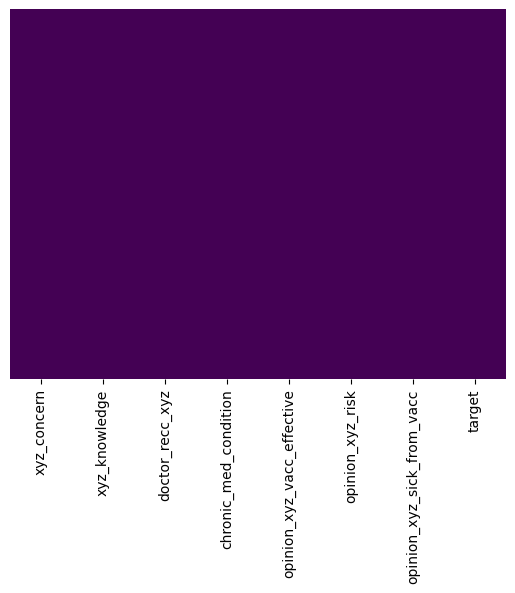

In [24]:
sns.heatmap(data.isnull(),cmap='viridis', cbar=False, yticklabels=False)

In [12]:
data.isnull().sum()

xyz_concern                     92
xyz_knowledge                  116
doctor_recc_xyz               2160
chronic_med_condition          971
opinion_xyz_vacc_effective     391
opinion_xyz_risk               388
opinion_xyz_sick_from_vacc     395
target                           0
dtype: int64

In [13]:
data.xyz_knowledge.value_counts()

xyz_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64

In [14]:
data[['target',"xyz_concern"]].value_counts(dropna=False).sort_index()

target  xyz_concern
0       0.0            2849
        1.0            6756
        2.0            8102
        3.0            3250
        NaN              76
1       0.0             447
        1.0            1397
        2.0            2473
        3.0            1341
        NaN              16
Name: count, dtype: int64

In [15]:
data.loc[:,["xyz_knowledge",'target']]

xyz_knowledge  target
0                0.0       0
1                2.0       0
2                1.0       0
3                1.0       0
4                1.0       0
5                1.0       0
6                0.0       0
7                0.0       1
8                2.0       0
9                1.0       0
10               1.0       1
11               2.0       1
12               1.0       0
13               1.0       0
14               1.0       0
15               1.0       0
16               1.0       1
17               1.0       0
18               2.0       0
19               2.0       0
20               1.0       0
21               2.0       0
22               1.0       0
23               0.0       0
24               1.0       0
25               2.0       0
26               1.0       1
27               2.0       0
28               1.0       0
29               1.0       0
30               2.0       0
31               1.0       1
32               2.0       0
33               1.0       1
34               1.0       1
35               1.0       1
36               2.0       0
37               1.0       0
38               1.0       1
39               1.0       0
40               2.0       0
41               1.0       1
42               0.0       0
43               1.0       1
44               2.0       0
45               1.0       0
46               2.0       1
47               2.0       1
48               2.0       1
49               1.0       1
50               2.0       0
51               1.0       0
52               1.0       0
53               2.0       0
54               1.0       0
55               1.0       0
56               1.0       0
57               1.0       1
58               2.0       0
59               1.0       0
60               2.0       1
61               2.0       0
62               1.0       0
63               1.0       0
64               0.0       0
65               1.0       0
66               1.0       0
67               2.0       1
68               1.0       0
69               2.0       0
70               1.0       0
71               1.0       0
72               1.0       0
73               2.0       0
74               1.0       1
75               1.0       1
76               1.0       0
77               1.0       0
78               1.0       0
79               1.0       0
80               1.0       0
81               1.0       0
82               2.0       1
83               1.0       0
84               2.0       0
85               1.0       1
86               2.0       0
87               1.0       0
88               0.0       0
89               1.0       0
90               1.0       0
91               2.0       0
92               1.0       0
93               1.0       0
94               0.0       0
95               2.0       0
96               1.0       0
97               2.0       0
98               1.0       0
99               0.0       0
100              1.0       0
101              2.0       0
102              2.0       0
103              1.0       0
104              0.0       0
105              1.0       0
106              2.0       0
107              1.0       1
108              2.0       0
109              1.0       0
110              2.0       1
111              1.0       0
112              2.0       1
113              1.0       0
114              1.0       0
115              0.0       0
116              1.0       1
117              1.0       0
118              2.0       0
119              2.0       0
120              1.0       0
121              1.0       1
122              2.0       1
123              2.0       0
124              1.0       0
125              1.0       0
126              1.0       0
127              2.0       1
128              1.0       1
129              1.0       0
130              1.0       0
131              1.0       0
132              1.0       0
133              1.0       0
134              2.0       0
135              1.0       0
136              NaN       1
137  

In [16]:
data.fillna({"xyz_concern":2},inplace=True)

In [17]:
data.fillna({"xyz_knowledge":2},inplace=True)

In [18]:
data.fillna({"doctor_recc_xyz":data.doctor_recc_xyz.mode()[0]},inplace=True)

In [19]:
data.fillna({"chronic_med_condition":data.chronic_med_condition.mode()[0]},inplace=True)

In [20]:
data.fillna({"opinion_xyz_vacc_effective":data.opinion_xyz_vacc_effective.mode()[0]},inplace=True)

In [21]:
data.fillna({"opinion_xyz_risk":data.opinion_xyz_risk.mode()[0]},inplace=True)

In [22]:
data.fillna({"opinion_xyz_sick_from_vacc":data.opinion_xyz_sick_from_vacc.mode()[0]},inplace=True)

In [23]:
data.to_csv("xyz.csv",index=False)